In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from manage_data.manage_data_city import ManageDataCity

In [74]:
manage_data = ManageDataCity()
df = manage_data.df_merge_all()

In [4]:
df.head()

,id_cliente,nombre_producto,cantidad,precio_unitario,fecha,categoria,pais,ciudad,metodo_pago,edad_cliente,genero_cliente,calificacion_satisfaccion,venta_total,city,country,lat,lng
0,1,Reloj,5,512.56,2024-06-02 18:49:13.249,Accesorios,Argentina,Buenos Aires,Efectivo,31,Femenino,3,2562.80,Buenos Aires,Argentina,-34.6036,-58.3814
1,2,Televisor,1,307.40,2023-12-11 18:49:13.249,Electrónica,Argentina,Buenos Aires,Efectivo,29,Masculino,2,307.40,Buenos Aires,Argentina,-34.6036,-58.3814
2,3,Laptop,9,554.01,2024-03-31 18:49:13.249,Electrónica,España,Madrid,PayPal,40,Masculino,2,4986.09,Madrid,España,40.4169,-3.7033
3,4,Jeans,4,931.51,2024-02-24 18:49:13.249,Ropa,México,Ciudad de México,Efectivo,60,Masculino,1,3726.04,Ciudad de México,México,19.4333,-99.1333
4,5,Audífonos,6,525.55,2023-11-29 18:49:13.249,Accesorios,Perú,Lima,Tarjeta de crédito,57,Masculino,5,3153.30,Lima,Perú,-12.0600,-77.0375


## Gráfico de Barras Apiladas: Ventas por categoría desglosado por método de pago. 

In [13]:
# Gráfico de Barras Apiladas: Ventas por categoría desglosado por método de pago. 
df_grouped_category_payment = df[['categoria', 'metodo_pago']].groupby(['categoria', 'metodo_pago']).size().reset_index(name='conteo')

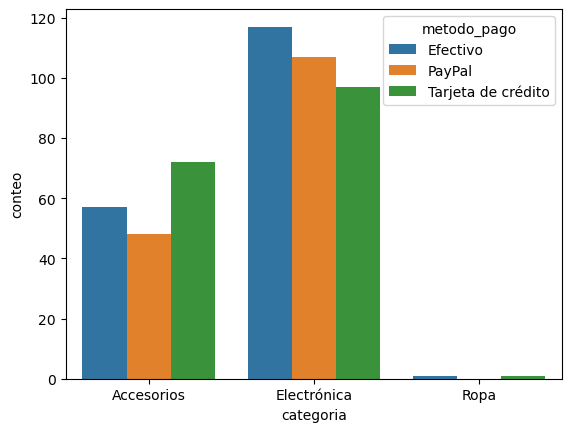

In [17]:
sns.barplot(x='categoria', y='conteo', hue='metodo_pago', data=df_grouped_category_payment)
plt.show()

## Gráfico de Calor (Heatmap): Correlación entre edad, satisfacción y cantidad comprada.

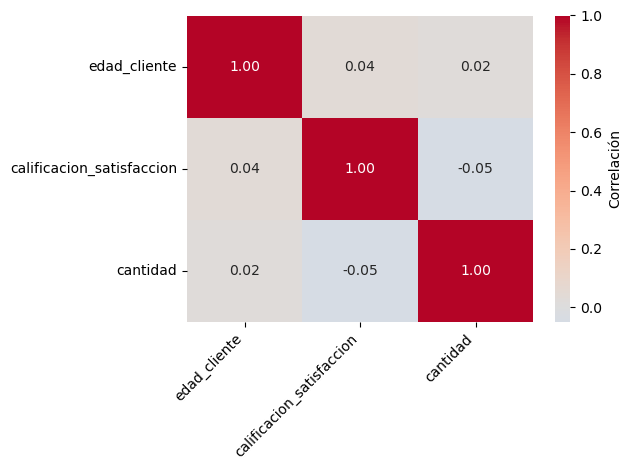

In [26]:
# Calcular la matriz de correlación
correlation_matrix = df[['edad_cliente', 'calificacion_satisfaccion', 'cantidad']].corr()

# Crear el heatmap con rotación de etiquetas
sns.heatmap(correlation_matrix, 
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f',
            xticklabels=correlation_matrix.columns,
            yticklabels=correlation_matrix.columns,
            cbar_kws={'label': 'Correlación'})

# Rotar las etiquetas
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Ajustar el layout para evitar que se corten las etiquetas
plt.tight_layout()
plt.show()

## Boxplot: Comparar distribución de precios por categoría de producto

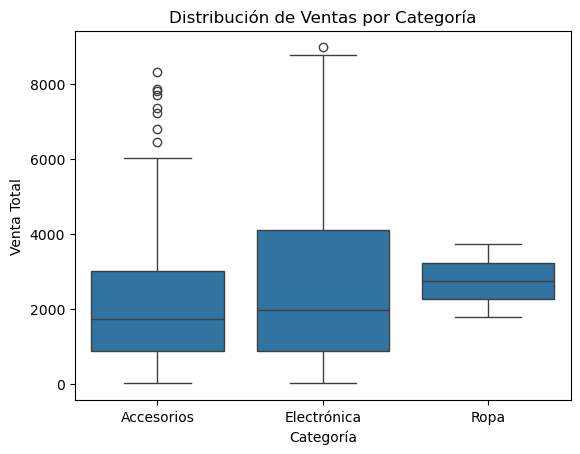

In [32]:
# Boxplot: Distribución de ventas por categoría de producto.
sns.boxplot(x='categoria', y='venta_total', data=df)
plt.xlabel('Categoría')
plt.ylabel('Venta Total')
plt.title('Distribución de Ventas por Categoría')
plt.show()

## Gráfico de Líneas: Evolución de la satisfacción del cliente a lo largo del tiempo. 

In [36]:
# Gráfico de Líneas: Evolución de la satisfacción del cliente a lo largo del tiempo. 
## convertir fecha a date sin time
df_satisfaccion = df[['fecha', 'calificacion_satisfaccion']]
df_satisfaccion['fecha'] = pd.to_datetime(df_satisfaccion['fecha']).dt.date
df_satisfaccion = df_satisfaccion.groupby('fecha').mean().reset_index()

/tmp/ipykernel_14800/479606522.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_satisfaccion['fecha'] = pd.to_datetime(df_satisfaccion['fecha']).dt.date


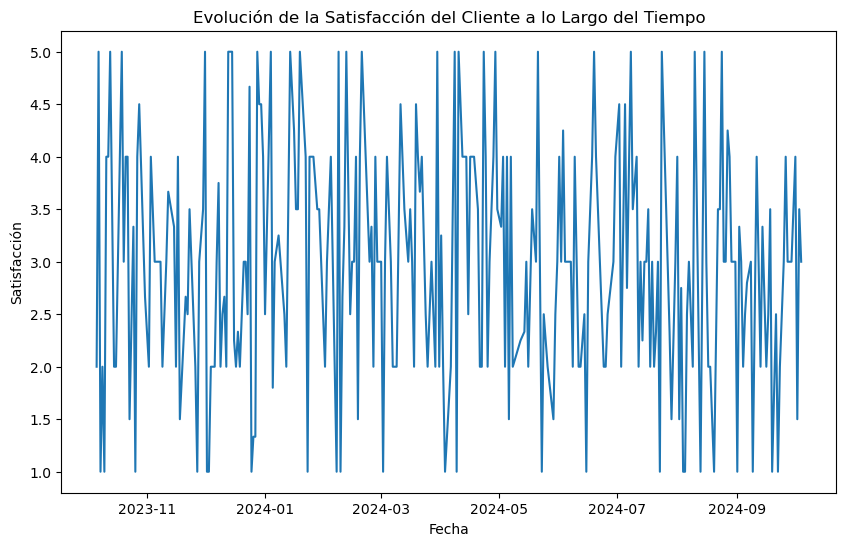

In [43]:
# Gráfico de Líneas: Evolución de la satisfacción del cliente a lo largo del tiempo. 
plt.figure(figsize=(10, 6))
sns.lineplot(x='fecha', y='calificacion_satisfaccion', data=df_satisfaccion)
plt.xlabel('Fecha')
plt.ylabel('Satisfacción')
plt.title('Evolución de la Satisfacción del Cliente a lo Largo del Tiempo')
plt.show()

## Satisfacción por categoria

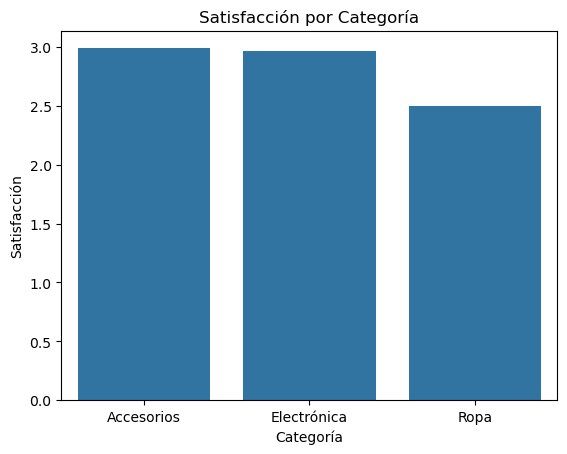

In [71]:
df.head()
df[['categoria','calificacion_satisfaccion']].groupby('categoria').mean().reset_index()

sns.barplot(x='categoria', y='calificacion_satisfaccion', data=df[['categoria','calificacion_satisfaccion']].groupby('categoria').mean().reset_index())
plt.xlabel('Categoría')
plt.ylabel('Satisfacción')
plt.title('Satisfacción por Categoría')
plt.show()

## Segmentación de mercado:

### Agrupación por rangos de edad (<30, 30–45, >45) 

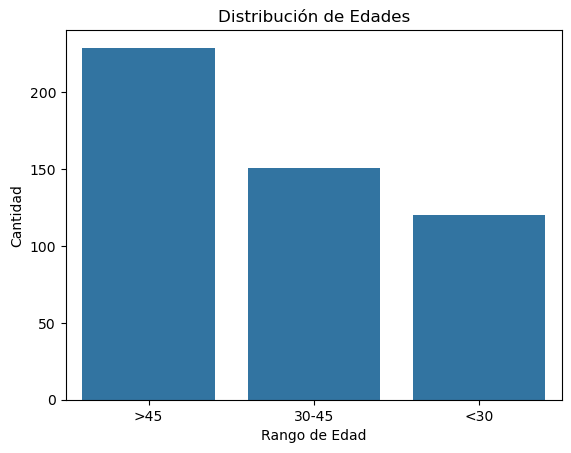

In [87]:
df_age_group = df[['edad_cliente']].groupby('edad_cliente').size().reset_index(name='cantidad')
df_age_group['rango_edad'] = df_age_group['edad_cliente'].apply(lambda x: '<30' if x < 30 else '30-45' if x < 45 else '>45')
df_range_age = df_age_group[['rango_edad', 'cantidad']].groupby('rango_edad').sum('cantidad').reset_index()
df_range_age.columns = ['rango_edad', 'cantidad']
# Ordenar por cantidad
df_range_age = df_range_age.sort_values(by='cantidad', ascending=False)
# Gráfico de Barras: Distribución de edades.
sns.barplot(x='rango_edad', y='cantidad', data=df_range_age)
plt.xlabel('Rango de Edad')
plt.ylabel('Cantidad')
plt.title('Distribución de Edades')
plt.show()

### Comparación de satisfacción por género

In [63]:
df[['genero_cliente', 'calificacion_satisfaccion' ]].groupby('genero_cliente').mean().reset_index()

,genero_cliente,calificacion_satisfaccion
0,Femenino,3.041667
1,Masculino,2.903846


In [66]:
df[['genero_cliente', 'calificacion_satisfaccion' ]].groupby('genero_cliente').mean().reset_index()

,genero_cliente,calificacion_satisfaccion
0,Femenino,3.041667
1,Masculino,2.903846


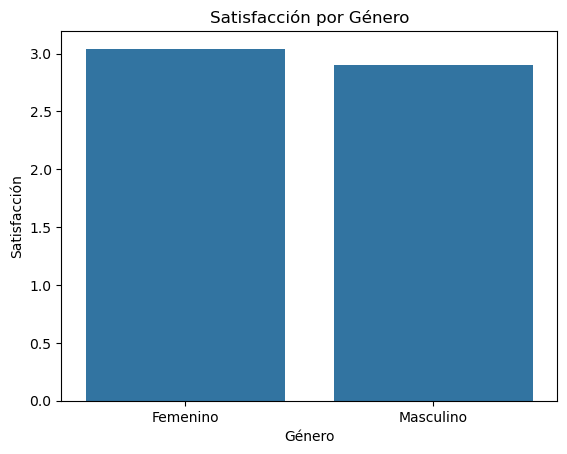

In [68]:
df_satisfaccion_genero = df[['genero_cliente', 'calificacion_satisfaccion' ]].groupby('genero_cliente').mean().reset_index()
df_satisfaccion_genero.columns = ['genero_cliente', 'calificacion_satisfaccion']

# Gráfico de Barras: Satisfacción por género.
sns.barplot(x='genero_cliente', y='calificacion_satisfaccion', data=df_satisfaccion_genero)
plt.xlabel('Género')
plt.ylabel('Satisfacción')
plt.title('Satisfacción por Género')
plt.show()